# <center> STERLING E-COMMERCE CUSTOMER ANALYSIS</center>

### Import Required Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

### Importing CSV File

In [60]:
# load dataset 

df = pd.read_csv(r"C:\Users\RANDY\Downloads\Sterling E-Commerce Data.csv")

## DATA ASSESSMENT

In [61]:
# check the first 5 rows of dataset

df.head()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2/11/2008,8/7/2022 0:00,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9
3,Computing,Young America,Carver,112501,9/15/2013,8/18/2022 0:00,"Doiron, Latrina",F,886067,100551079.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,6822.9
4,Entertainment,Young America,Carver,112501,9/15/2013,8/20/2022 0:00,"Doiron, Latrina",F,886878,100551618.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,2849.9


In [62]:
# check the dimension of dataset

print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 283083
Number of columns: 19


In [63]:
# check dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Category        283083 non-null  object 
 1   City            283083 non-null  object 
 2   County          283083 non-null  object 
 3   Cust Id         283083 non-null  int64  
 4   Customer Since  283083 non-null  object 
 5   Date of Order   283083 non-null  object 
 6   Full Name       283083 non-null  object 
 7   Gender          283083 non-null  object 
 8   Item Id         283083 non-null  int64  
 9   Order Id        283078 non-null  float64
 10  Payment Method  283083 non-null  object 
 11  Place Name      283083 non-null  object 
 12  Ref Num         283083 non-null  int64  
 13  Region          283083 non-null  object 
 14  State           283083 non-null  object 
 15  User Name       283083 non-null  object 
 16  Zip             283083 non-null  int64  
 17  Qty Ordere

In [64]:
# Descriptive Statistics of Numerical Columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust Id,283083.0,7.010682e+04,30215.394879,4.0,56640.0,74320.0,92371.0,1.153260e+05
Item Id,283083.0,7.417471e+05,95664.609013,574769.0,659898.5,742471.0,826078.5,9.052080e+05
Order Id,283078.0,1.004570e+08,60909.919565,100354677.0,100404736.0,100451836.5,100513392.0,1.005624e+08
Ref Num,283083.0,5.611079e+05,256101.205409,111127.0,341071.0,565623.0,782211.0,9.999810e+05
Zip,283083.0,4.914717e+04,27235.561738,210.0,26264.0,48808.0,72004.0,9.940200e+04
Qty Ordered,283083.0,3.008224e+00,4.565168,1.0,2.0,2.0,3.0,5.010000e+02
Total,283083.0,8.162307e+02,1986.164932,0.0,49.9,149.8,800.0,1.012626e+05


In [65]:
# Descriptive Statistics of Categorical Columns

df.describe(include=['object', 'bool'])

,Category,City,County,Customer Since,Date of Order,Full Name,Gender,Payment Method,Place Name,Region,State,User Name
count,283083,283083,283083,283083,283083,283083,283083,283083,283083,283083,283083,283083
unique,15,15668,2518,11629,365,63610,2,13,15668,4,49,63407
top,Mobiles & Tablets,Dekalb,Jefferson,11/30/2005,12/20/2021 0:00,"Gonzalez, Joel",M,cod,Dekalb,South,TX,jugonzalez
freq,60954,2525,3510,2536,13522,2524,144295,101750,2525,103482,17510,2524


In [66]:
### Checking Duplicated Values

df.duplicated().sum()

0

The are no duplicated values in the dataset.

In [67]:
### Checking Null Values

df.isnull().sum()

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          5
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

there are 5 null values in the dataset, all found in the Order ID column.

## DATA WRANGLING

##### Converting Date Columns Datatypes to DateTime

In [68]:
# 'Date of Order' and 'Customer Since' columns in object datatype is converted to datetime

df['Date of Order'] = pd.to_datetime(df['Date of Order']) 
df['Customer Since'] = pd.to_datetime(df['Customer Since'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust Id         283083 non-null  int64         
 4   Customer Since  283083 non-null  datetime64[ns]
 5   Date of Order   283083 non-null  datetime64[ns]
 6   Full Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item Id         283083 non-null  int64         
 9   Order Id        283078 non-null  float64       
 10  Payment Method  283083 non-null  object        
 11  Place Name      283083 non-null  object        
 12  Ref Num         283083 non-null  int64         
 13  Region          283083 non-null  object        
 14  State           283083 non-null  obj

##### Removing Rows With Null Values

In [69]:
# removed null values instead of replacing them because they were very few (just 5)

df.dropna(inplace=True)

df.isnull().sum()

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          0
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

##### Group Customers by Tenure (Date of First Order)

In [70]:
# Extracting Year from Customer Since Column
df['Year_Since'] = df['Customer Since'].dt.year

# customers are grouped based on date of first order
def cust_group(x):
    if x <= 1988:
        return 'Customer Type A' # customers before 1988
    elif x <= 1998:
        return 'Customer Type B' # customers before 1998
    elif x <= 2008:
        return 'Customer Type C' # customer before 2008
    else:
        return 'Customer Type D' # customers after 2008

# applying function to dataset
df['Customer_Group']  = df['Year_Since'].apply(cust_group)
df.head(2)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total,Year_Since,Customer_Group
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,...,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0,2008,Customer Type C
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,...,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8,2005,Customer Type C


## EDA

### Customers' Demographic Analysis

##### Number of Customers

In [71]:
# Count the number of unique customers
uniq_customers_count = df['Cust Id'].nunique()

print(f'Count of Unique Customers: {uniq_customers_count}')

Count of Unique Customers: 63646


##### Customer Gender Distribution

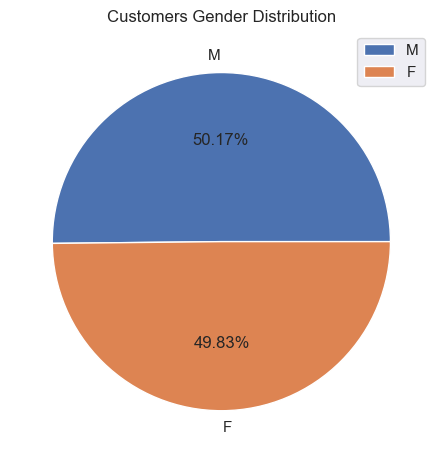

In [72]:
# count of customers by gender
uniq_customers = df.drop_duplicates(subset='Cust Id')
gend_counts = uniq_customers['Gender'].value_counts()

# pie chart for unique customers by gender
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.title('Customers Gender Distribution')
plt.pie(gend_counts, labels=gend_counts.index, autopct='%1.2f%%')
plt.legend()
plt.show()

##### Purchase Behaviour by Gender

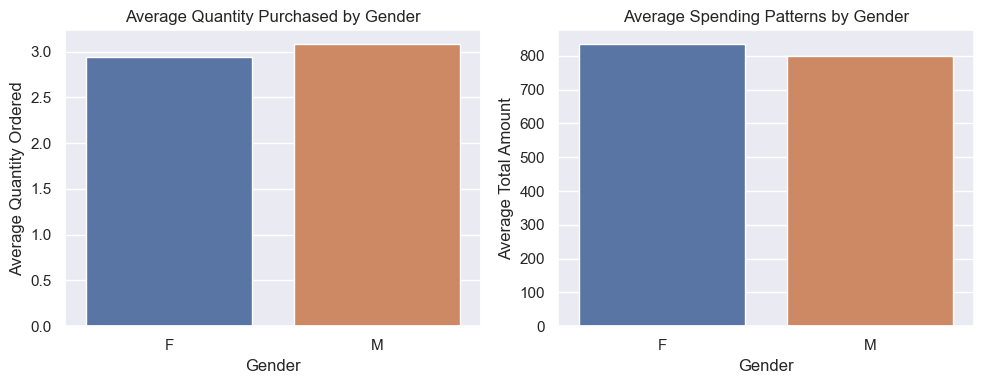

In [73]:
# Segment customers based on gender
gender_segments = df.groupby('Gender')

# Calculate average purchase behavior and spending patterns by gender
purchase_behavior = gender_segments['Qty Ordered'].mean()
spending_patterns = gender_segments['Total'].mean()

# Plot the results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=purchase_behavior.index, y=purchase_behavior.values)
plt.xlabel('Gender')
plt.ylabel('Average Quantity Ordered')
plt.title('Average Quantity Purchased by Gender')

plt.subplot(1, 2, 2)
sns.barplot(x=spending_patterns.index, y=spending_patterns.values)
plt.xlabel('Gender')
plt.ylabel('Average Total Amount')
plt.title('Average Spending Patterns by Gender')

plt.tight_layout()
plt.show()

##### Customer Concentration by Region and State

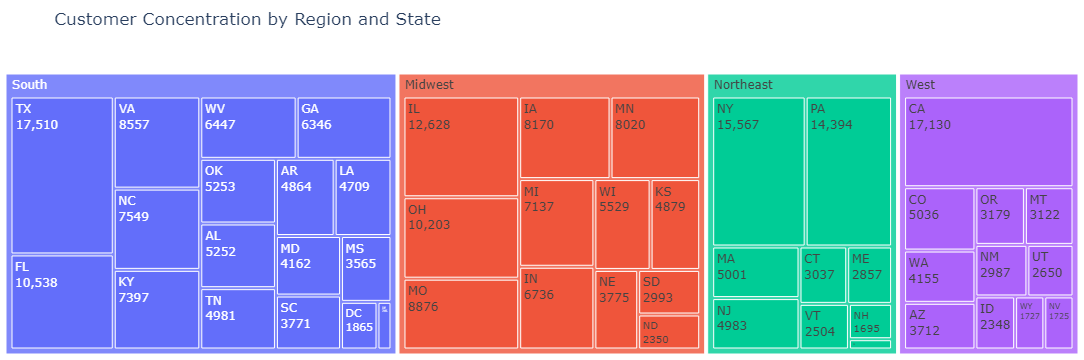

In [74]:
# Group the data by region and state and count the number of customers
customer_count = df.groupby(['Region', 'State'])['Cust Id'].count().reset_index()

# Create a treemap
fig = px.treemap(customer_count, path=['Region', 'State'], values='Cust Id', 
                 title='Customer Concentration by Region and State')

# Customize the appearance of the treemap
fig.update_traces(textinfo='label+value')
fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))

# Display the treemap
fig.show()


##### Top 15 States by Total Amounts

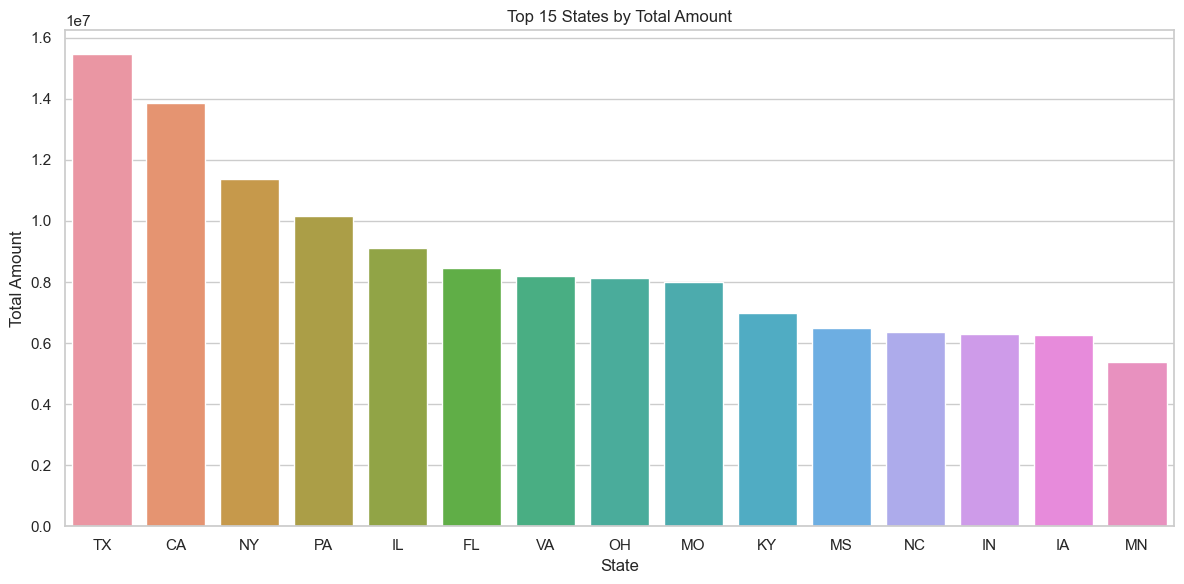

In [75]:
# Group the data by state and calculate the total amount
grouped_data = df.groupby('State')['Total'].sum().sort_values(ascending=False).head(15)

# Convert the grouped data to a DataFrame
top_15_states = pd.DataFrame({'State': grouped_data.index, 'Total Amount': grouped_data.values})

# Plotting the top 15 states by total amount
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_states, x='State', y='Total Amount')

plt.xlabel('State')
plt.ylabel('Total Amount')
plt.title('Top 15 States by Total Amount')

plt.tight_layout()
plt.show()

### Product Category Analysis

##### Customers' Category Preference

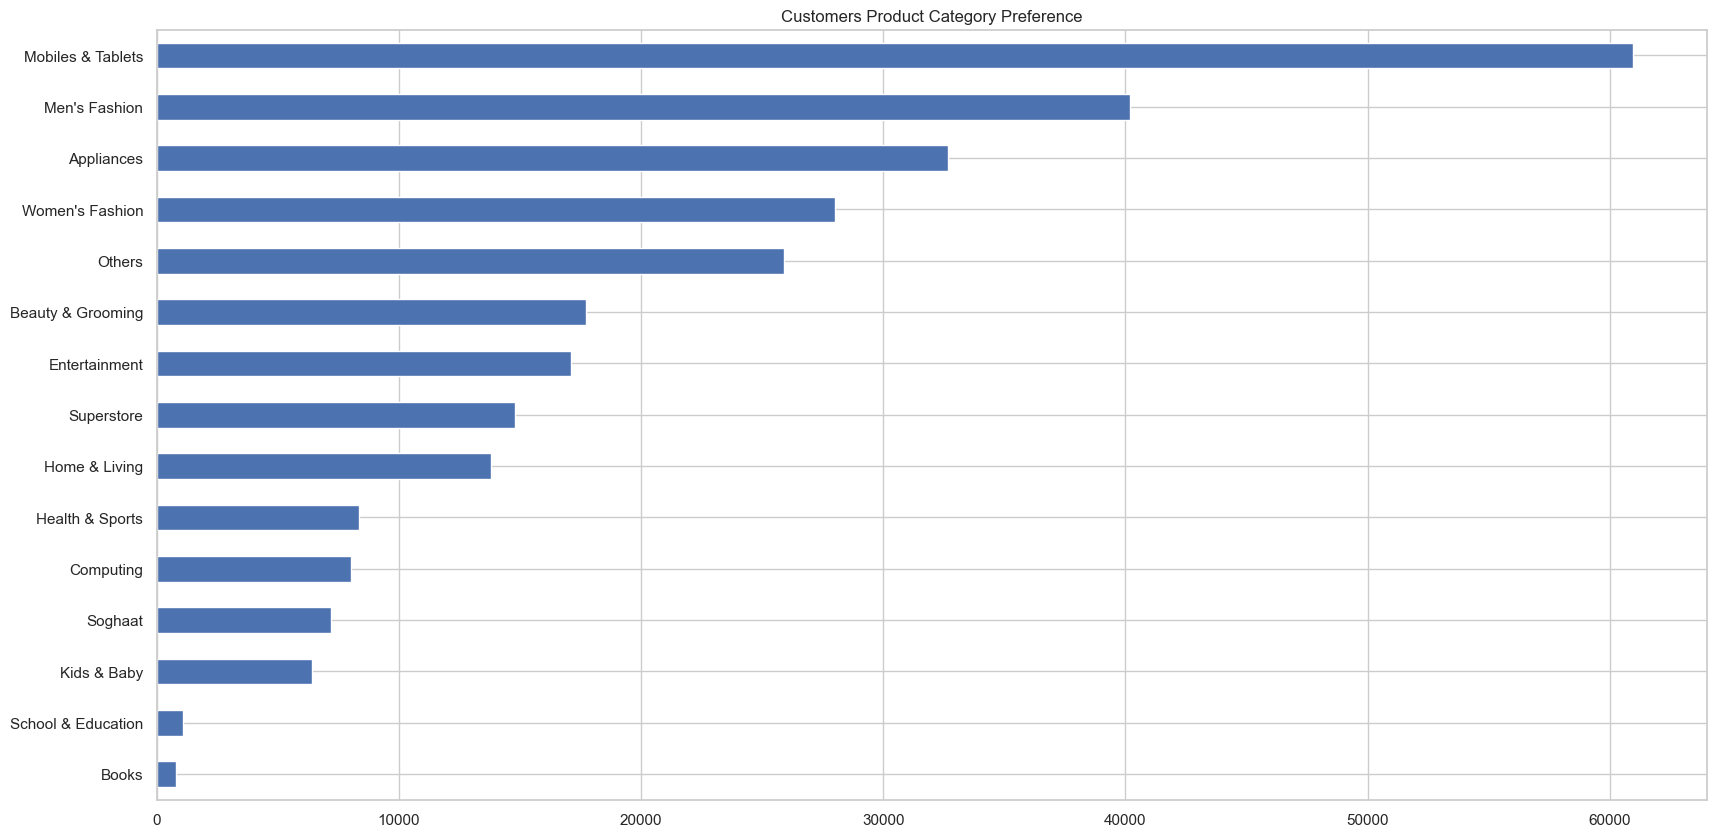

In [76]:
plt.figure(figsize=(20,10))
count = df['Category'].value_counts()
ax = df['Category'].value_counts(ascending=True).plot(kind='barh')
plt.title('Customers Product Category Preference');

##### Top 5 Product Categories by Revenue and Quantity

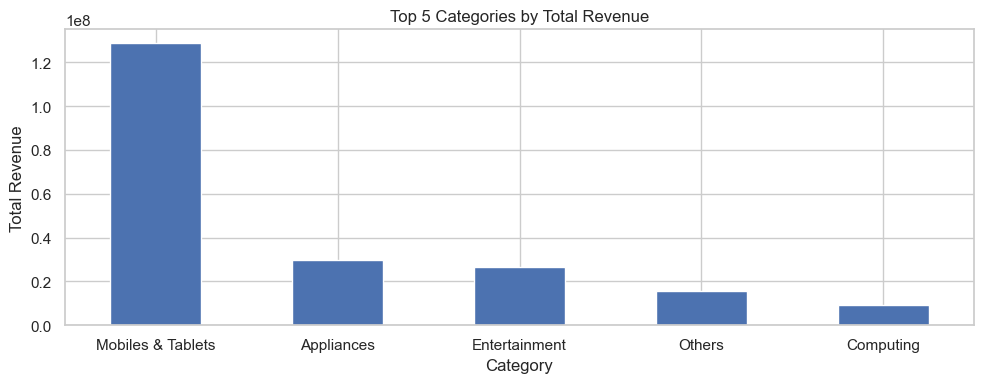

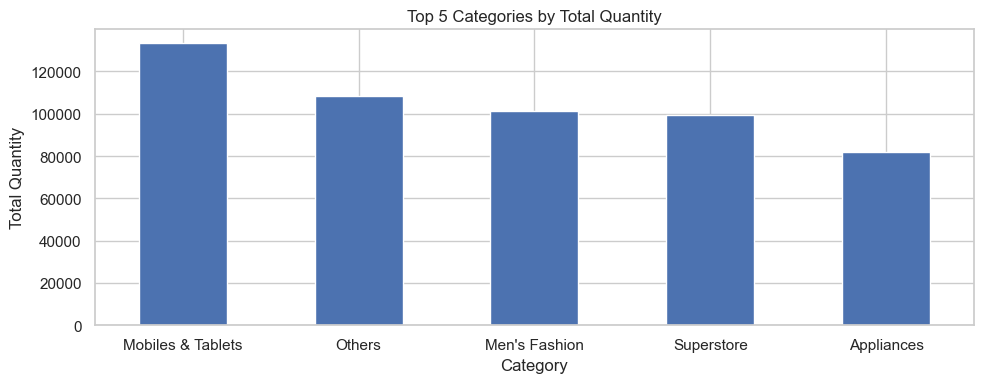

In [77]:
# calculate total revenue and quantity by category
category_totals = df.groupby('Category').agg({'Total': 'sum', 'Qty Ordered': 'sum'})

# total revenue and quantity sorting
sorted_by_total_revenue = category_totals.sort_values('Total', ascending=False)
sorted_by_total_quantity = category_totals.sort_values('Qty Ordered', ascending=False)

# top five categories by total revenue and quantity
top_categories_by_revenue = sorted_by_total_revenue.head(5)
top_categories_by_quantity = sorted_by_total_quantity.head(5)

# plot of top categories by total revenue
plt.figure(figsize=(10, 4))
top_categories_by_revenue['Total'].plot(kind='bar')
plt.title('Top 5 Categories by Total Revenue')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# plot of top categories by total quantity
plt.figure(figsize=(10, 4))
top_categories_by_quantity['Qty Ordered'].plot(kind='bar')
plt.title('Top 5 Categories by Total Quantity')
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Customer Purchase Behaviour Analysis

##### Payment Method Popularity

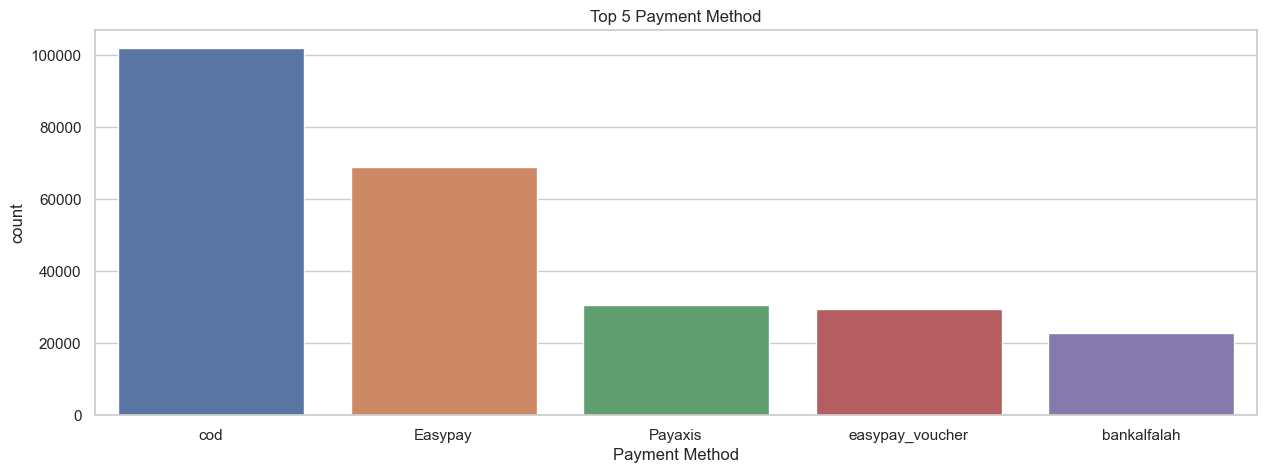

In [78]:
plt.figure(figsize=(15,5))

t5 = df['Payment Method'].value_counts().head(5)
chart = sns.countplot(x=df['Payment Method'], order=t5.index)
chart.set_title('Top 5 Payment Method');

##### Quantity Purchased and Total Amount

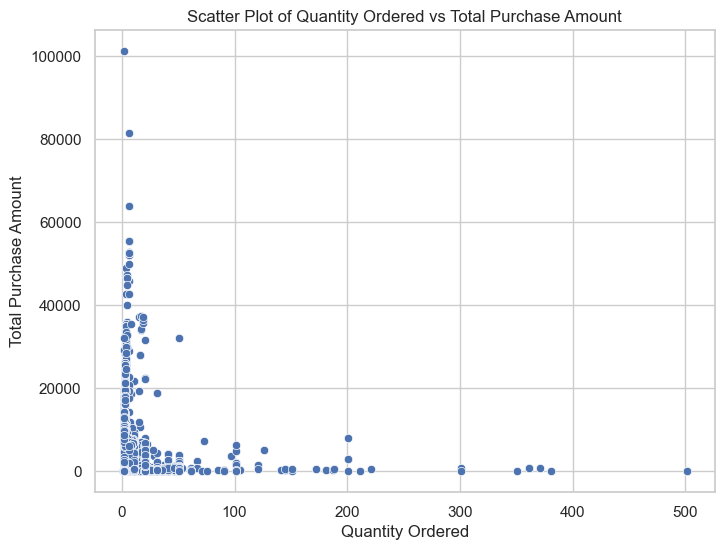

In [79]:
# scatter plot to visualize the relationship between quantity ordered and total purchase amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Qty Ordered'], y=df['Total'])
plt.xlabel('Quantity Ordered')
plt.ylabel('Total Purchase Amount')
plt.title('Scatter Plot of Quantity Ordered vs Total Purchase Amount')

# Display the plot
plt.show()

##### Customer Purchase Behaviour across Months

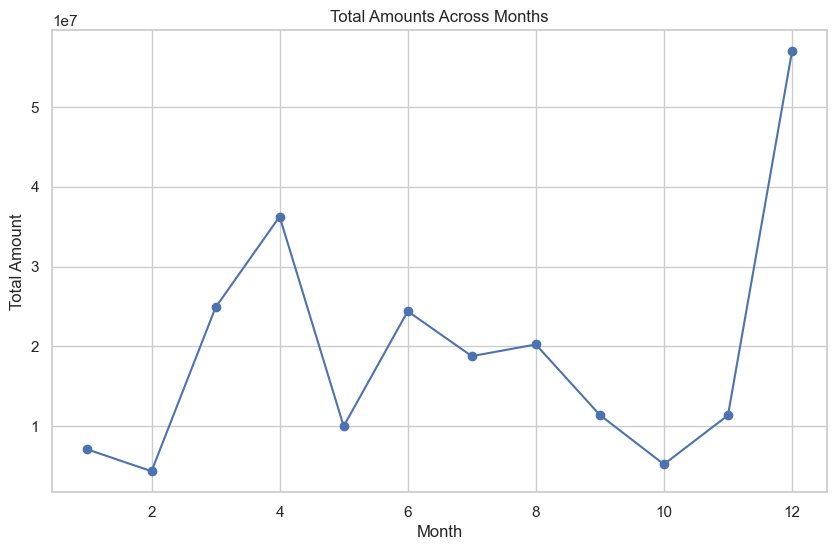

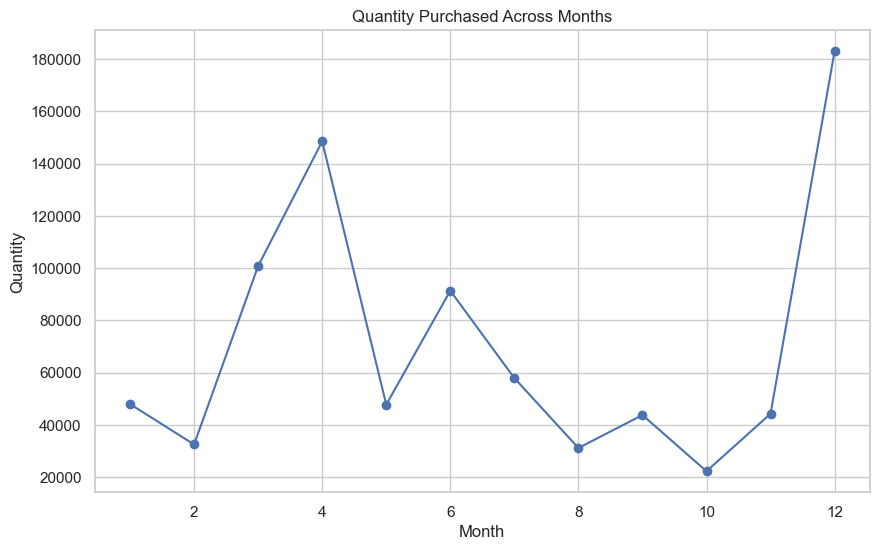

In [80]:
# Convert the "Date of Order" column to datetime
df['Date of Order'] = pd.to_datetime(df['Date of Order'])

# Extract the month from the "Date of Order" column
df['Month'] = df['Date of Order'].dt.month

# Group the data by month and calculate the total amount and quantity
total_amount_by_month = df.groupby('Month')['Total'].sum()
total_quantity_by_month = df.groupby('Month')['Qty Ordered'].sum()

# Create the first chart: Total amounts across months
plt.figure(figsize=(10, 6))
plt.plot(total_amount_by_month.index, total_amount_by_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.title('Total Amounts Across Months')

# Create the second chart: Quantity across months
plt.figure(figsize=(10, 6))
plt.plot(total_quantity_by_month.index, total_quantity_by_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Purchased Across Months')

plt.show()

### Customer Loyalty and Retention Analysis

##### High Value Customers

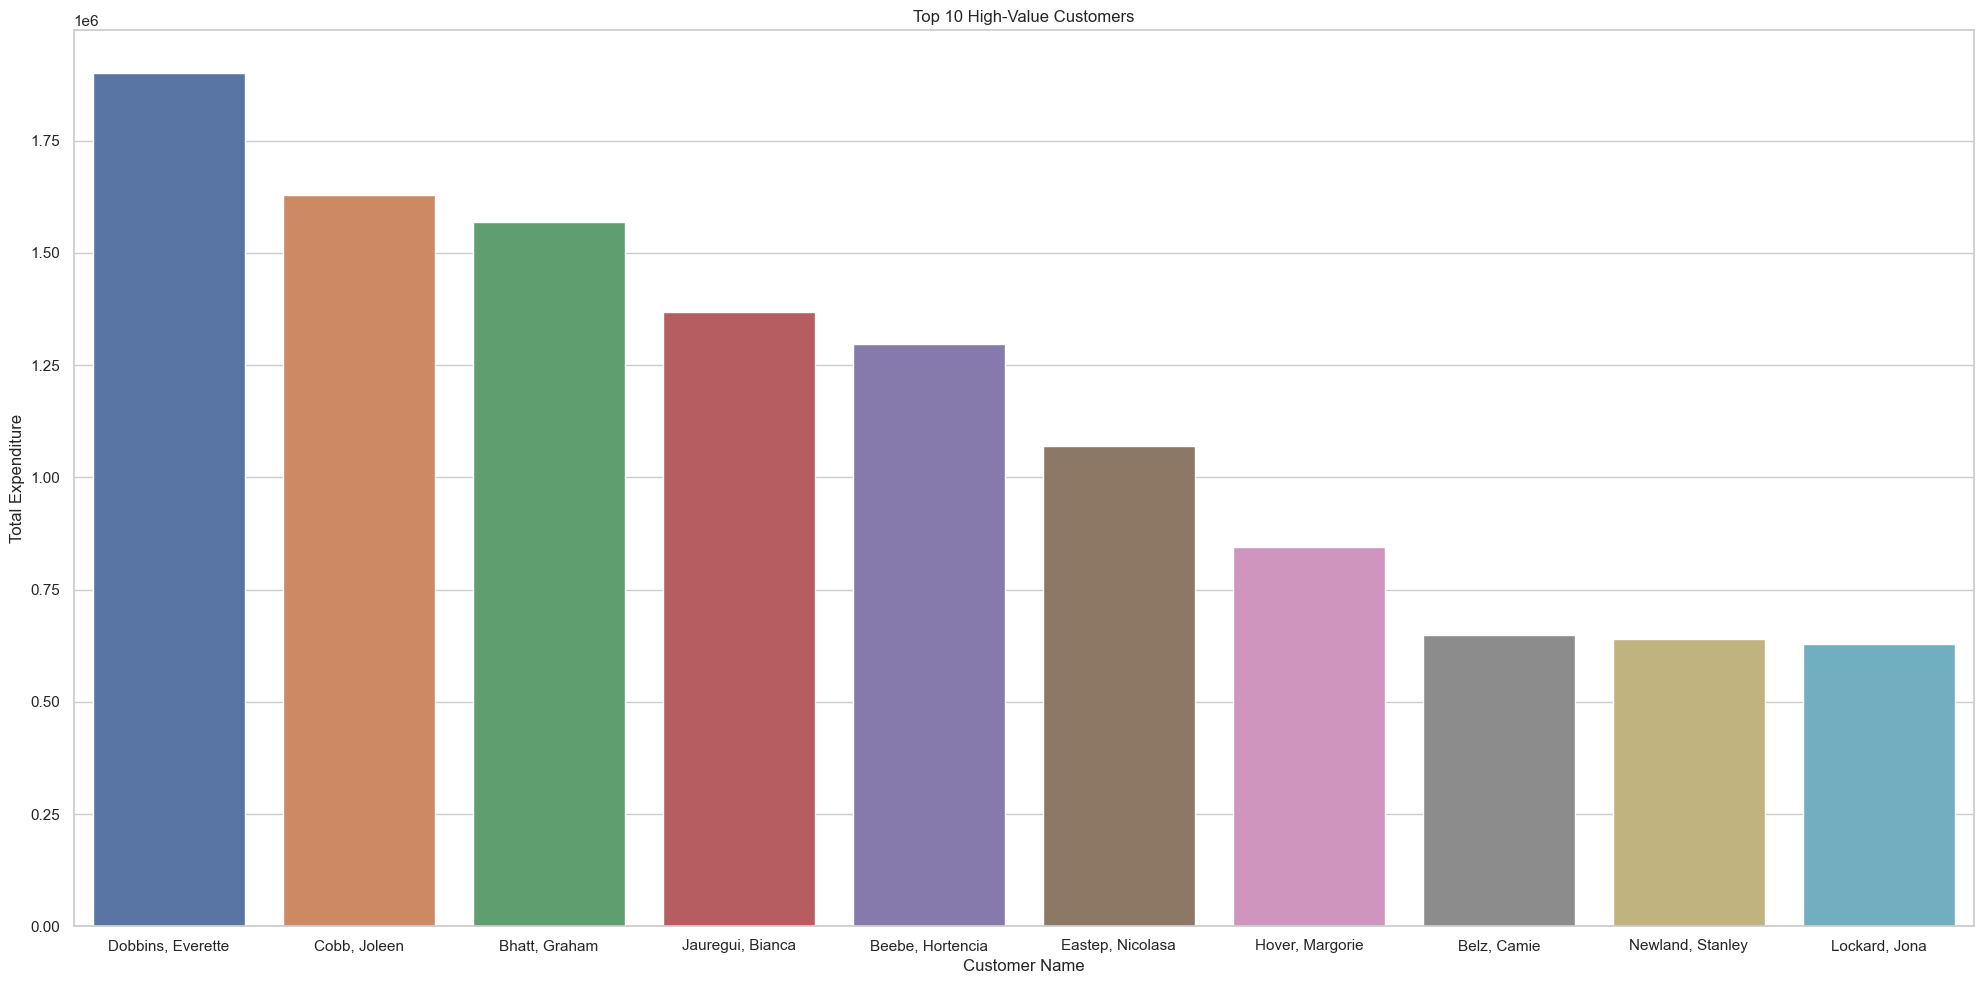

In [81]:
# Group the data by 'Cust Id' and calculate the total expenditure for each customer
customer_expenditure = df.groupby(['Cust Id', 'Full Name'])['Total'].sum()

# Sort the customers based on total expenditure in descending order
sorted_customers = customer_expenditure.sort_values(ascending=False)

# Select the top 10 high-value customers
top_10_customers = sorted_customers.head(10).reset_index()

# Plot the bar chart
plt.figure(figsize=(20, 10))
sns.barplot(x='Full Name', y='Total', data=top_10_customers)
plt.xlabel('Customer Name')
plt.ylabel('Total Expenditure')
plt.title('Top 10 High-Value Customers')
plt.tight_layout();

##### Customer Tenure

In [82]:
# Sort the DataFrame by "Customer Since"
df_sorted1 = df.sort_values('Customer Since', ascending=True)
df_sorted2 = df.sort_values('Customer Since', ascending=False)

# Retrieve the first and last customer name and date
first_customer_name = df_sorted1.iloc[0]['Full Name']
first_customer_date = df['Customer Since'].min()

# Retrieve the first customer name
last_customer_name = df_sorted2.iloc[0]['Full Name']
last_customer_date = df['Customer Since'].max()

print(f'First Customer name is: {first_customer_name} \nJoined on: {first_customer_date}')
print('------------------------------')
print(f'Last Customer name is: {last_customer_name} \nJoined on: {last_customer_date}')

First Customer name is: Glessner, Ronny 
Joined on: 1978-11-04 00:00:00
------------------------------
Last Customer name is: Laforge, Ray 
Joined on: 2017-07-28 00:00:00


##### Purchases by Customer Type

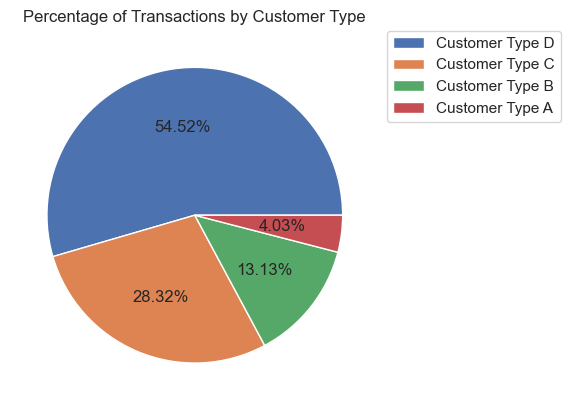

In [83]:
# count transactions by each customer type
data = df['Customer_Group'].value_counts()

# plot a pie chart by customer type
ax = data.plot(kind="pie", autopct='%1.2f%%', legend=True,
                   title='Percentage of Transactions by Customer Type', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left');

### Insight:
- The gender distribution of customers is 50.17% males to 49.83% females with similar purchasing and spending behaviour across both genders.
- Most of Sterlings' customers are in the South region where Texas (TX), the State with the highest custumer concentration is. The the states of California (CA) and New York (NY) are in the regions with the least customer numbers but they have the 2nd and 3rd highest customer concentration. These 3 states also lead in customer spending.
- The top 3 patronized products by customers are Mobiles & Tablets, Men's Fashion, and Appliances and the least 3 patronized products are Kids & Baby, School & Education, and Books.
- Most customers paid for products by cash_on_delivery (cod). They also purchase few products (2 or 3) per transaction, usually spending $1k or less.
- The months of December and April have high customer purchases and amount spent while February and October comes with low purchasing and spending by customers.
- By grouping customers by date of first order, it is observed that most of Sterlings sales (>50%) comes from recent decade customers (Customer Type D), with sales numbers decreasing across other customer groups by the groups tenure.






### Recommendation:
- Sterling can introduce E-books and virtual learning platforms to boost sales in School & Education and Books categories.
- Customers preference of cash_on_delivery should be looked into by understanding customers concerns in using electronic payment platforms as well as securing the existing electronic platforms.
- Old customers should be incentivized to transact with Sterling through means like loyalty cards and discounts.
- High value customers should be recognized by Sterling as well as marketing in states with high customer concentration should be intensified to keep Sterlings' products on customers mind.
- Customer purchasing behaviour across months should be looked into to understand the high sales in some months to help boost sales in months where product patronage is low. 